<a href="https://colab.research.google.com/github/Kate-Strydom/cse450/blob/main/notebooks/hint_decisiontrees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Load some test data
import pandas as pd
titanic = pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/titanic.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

# Drop missing values from embarked
titanic = titanic.dropna()

# Let's treat Pclass as categorical
titanic['Pclass_cat'] = titanic['Pclass'].astype('category')

# Encode our features and target as needed
features = ['Pclass_cat', 'Sex', 'Age', 'Embarked']
X = pd.get_dummies(titanic[features], drop_first=True)
y = titanic['Survived']

# Split our data into training and test data, with 30% reserved for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

# Build the decision tree
clf = DecisionTreeClassifier()

# Train it
clf.fit(X_train, y_train)

# Test it 
clf.score(X_test, y_test)

# Note that this gives us an accuracy score, which may not be the best metric.
# See the SciKit-Learn docs for more ways to assess a model's performance, as
# well as methods for cross validation.

0.7454545454545455

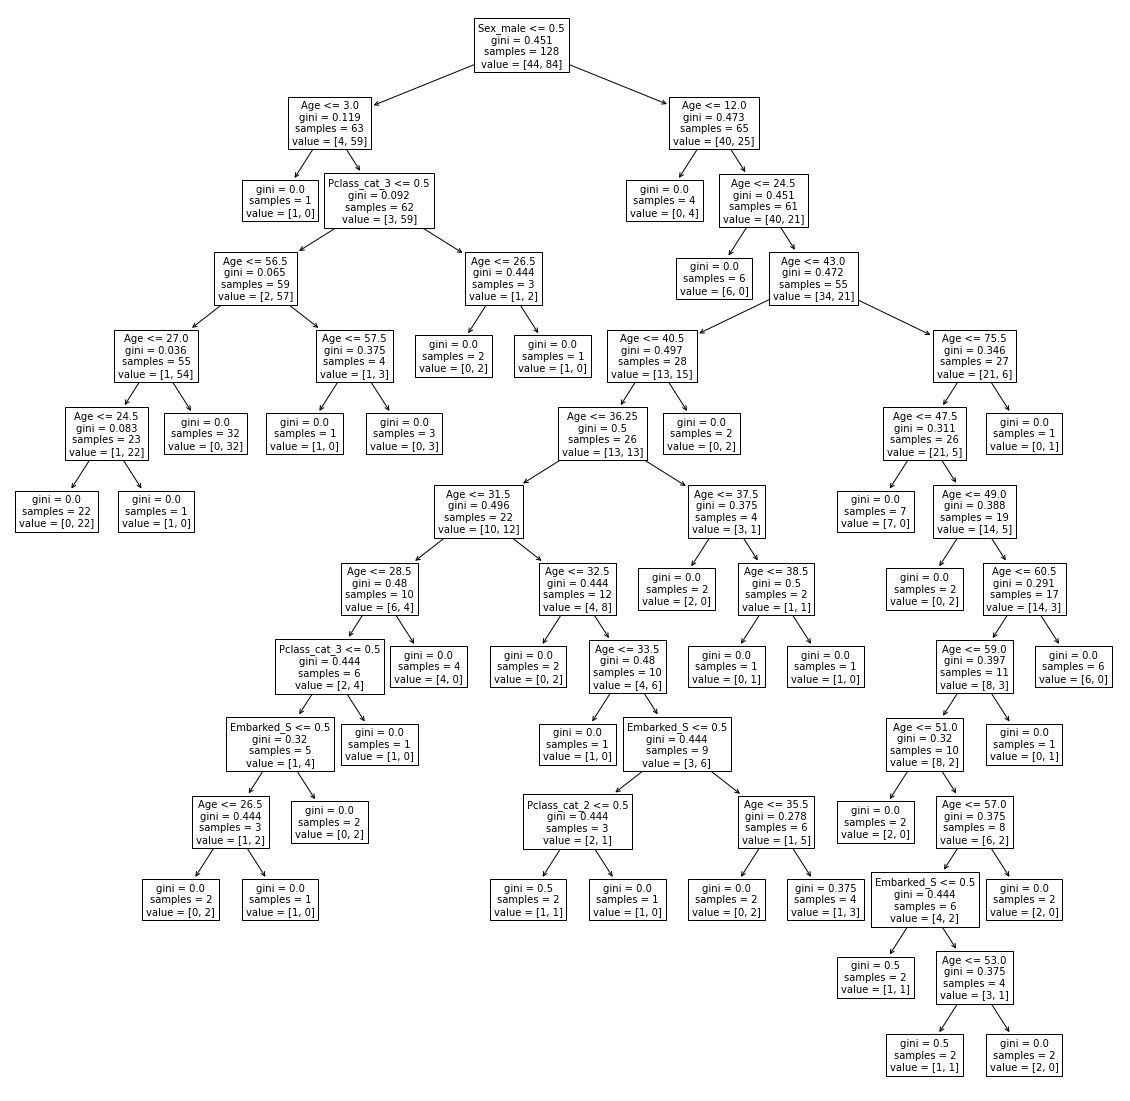

In [ ]:
# Let's visualize the tree
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(20, 20))
tree.plot_tree(clf, fontsize=10, feature_names=X.columns)
plt.show()